## Euler Rotations

In this notebook you'll explore Euler rotations and get a feel for why the order of rotations matters.

Euler rotations as we define them in this program are counterclockwise about the axes of the vehicle body frame, where:

- *Roll* - $\phi$ is about the x-axis
- *Pitch* - $\theta$ is about the y-axis
- *Yaw* - $\psi$ is about the z-axis

As you'll see the same set of rotation transformations, applied in a different order can produce a very different final result!

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from enum import Enum

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

In [3]:
class Rotation(Enum):
    ROLL = 0
    PITCH = 1
    YAW = 2  


class EulerRotation:
    def __init__(self, rotations):
        """
        `rotations` is a list of 2-element tuples where the
        first element is the rotation kind and the second element
        is angle in degrees.
        
        Ex:
        
            [(Rotation.ROLL, 45), (Rotation.YAW, 32), (Rotation.PITCH, 55)]
            
        """
        self._rotations = rotations
        self._rotation_map = {Rotation.ROLL : self.roll, 
                              Rotation.PITCH : self.pitch, 
                              Rotation.YAW : self.yaw}
        
    def roll(self, phi):
        """Returns a rotation matrix along the roll axis"""
        R_x = np.matrix([[1, 0, 0],
                        [0, np.cos(np.deg2rad(phi)), -np.sin(np.deg2rad(phi))],
                        [0, np.sin(np.deg2rad(phi)), np.cos(np.deg2rad(phi))]])
        return R_x
    
    def pitch(self, theta):
        """Returns the rotation matrix along the pitch axis"""
        R_y = np.matrix([[np.cos(np.deg2rad(theta)), 0, np.sin(np.deg2rad(theta))],
                        [0, 1, 0],
                        [-np.sin(np.deg2rad(theta)), 0, np.cos(np.deg2rad(theta))]])
        return R_y

    def yaw(self, psi):
        """Returns the rotation matrix along the yaw axis"""
        R_z = np.matrix([[np.cos(np.deg2rad(psi)), -np.sin(np.deg2rad(psi)), 0],
                        [np.sin(np.deg2rad(psi)), np.cos(np.deg2rad(psi)), 0],
                        [0, 0, 1]])
        return R_z

    def rotate(self):
        """Applies the rotations in sequential order"""
        t = np.matrix([[1,0,0],
                       [0,1,0],
                       [0,0,1]])
        for r in self._rotations:
            kind = r[0]
            angle = r[1] 
            t = self._rotation_map[kind](angle) * t
        return t

Below you'll form a sequence of rotations. The rotation matrix `R` is the mapping of performing the rotations in sequential order. Multiplying a vector by `R` will perform the rotations on that vector.

In [4]:
# Test your code by passing in some rotation values
rotations = [
    (Rotation.ROLL, 5),
    (Rotation.PITCH, 30),
    (Rotation.YAW, 60),
]

R = EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)
# Should print
# Rotation matrix ...
# [[ 0.    -0.906  0.423]
#  [ 0.259  0.408  0.875]
#  [-0.966  0.109  0.235]]

Rotation matrix ...
[[ 0.433 -0.841  0.325]
 [ 0.75   0.536  0.388]
 [-0.5    0.075  0.863]]


Go back and change the order of the rotations, you should get back a rotation matrix with different values.

### Same Rotations, Different Order

Now calculate three different rotations matrices. They should stem from the same set of Euler rotations, just in differing order.

In [5]:
# TODO: calculate 3 rotation matrices.
rot1 = [rotations[0], rotations[2], rotations[1]]
rot2 = [rotations[2], rotations[0], rotations[1]]
rot3 = [rotations[2], rotations[1], rotations[0]]

R1 = EulerRotation(rot1).rotate()
print('Rotation matrix R1 ...')
print(R1)
R2 = EulerRotation(rot2).rotate()
print('Rotation matrix R2 ...')
print(R2)
R3 = EulerRotation(rot3).rotate()
print('Rotation matrix R3 ...')
print(R3)

Rotation matrix R1 ...
[[ 0.433 -0.704  0.563]
 [ 0.866  0.498 -0.044]
 [-0.25   0.507  0.825]]
Rotation matrix R2 ...
[[ 0.471 -0.728  0.498]
 [ 0.863  0.498 -0.087]
 [-0.185  0.471  0.863]]
Rotation matrix R3 ...
[[ 0.433 -0.75   0.5  ]
 [ 0.885  0.46  -0.075]
 [-0.174  0.475  0.863]]


### Seeing is Believing

It's clear the three rotation matrices are different, but, in order to get an deeper understanding let's plot the impact of the rotations.

In [6]:
# unit vector along x-axis
v = np.matrix([[1, 0, 0]])
v = np.transpose(v)

Apply the rotations to `v`. Feel free to change the values of this input vector.

In [7]:
# TODO: calculate the new rotated versions of `v`.

rv1 = R1 * v
print(rv1)
rv2 = R2 * v
print(rv2)
rv3 = R3 * v
print(rv3)

[[ 0.433]
 [ 0.866]
 [-0.25 ]]
[[ 0.471]
 [ 0.863]
 [-0.185]]
[[ 0.433]
 [ 0.885]
 [-0.174]]


Plotting time ...

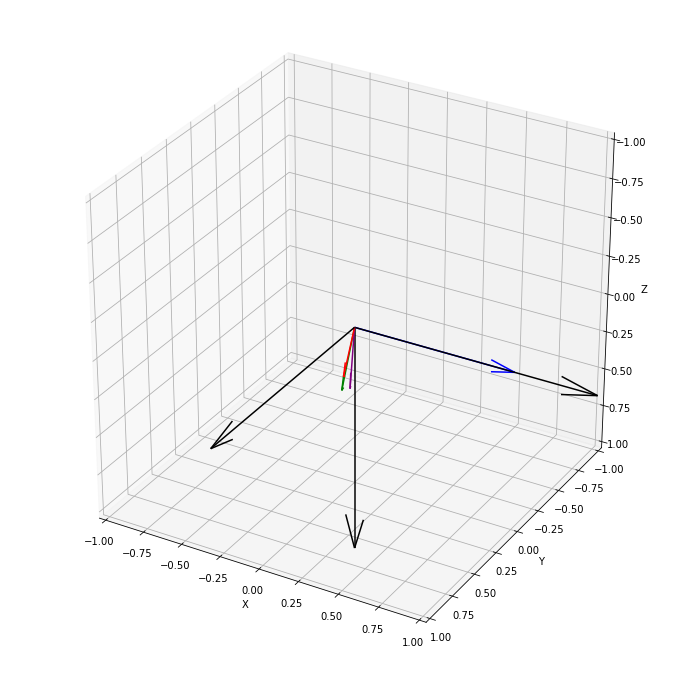

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# axes (shown in black)
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)


# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)

# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Gimbal Lock
To demonstrate gimbal lock try starting a series of rotations with a pitch of +/- 90 degrees, then see what happens when you try to yaw. Try the yaw first and see what happens!

[solution](/notebooks/Rotations-Solution.ipynb)